In [7]:
#A. In this question, we work with a simplified version of Heart dataset. Read the dataset file “Heart_short.csv” from github, and assign it to a Pandas DataFrame:

import pandas as pd

url = "https://github.com/mpourhoma/CS4661/raw/master/Heart_short.csv"
df = pd.read_csv(url)

In [11]:
#B. Generate the feature matrix and label vector (AHD). Then, normalize (scale) the features.

from sklearn.preprocessing import StandardScaler, LabelEncoder

X = df.drop('AHD', axis=1)  

label_encoder = LabelEncoder()
y = label_encoder.fit_transform(df['AHD'])  # Labels

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

print("Feature Matrix (X):")
print(X.head())

print("\nLabel Vector (AHD):")
print(y)

Feature Matrix (X):
   Age  RestBP  Chol  RestECG  MaxHR  Oldpeak
0   63     145   233        2    150      2.3
1   67     160   286        2    108      1.5
2   67     120   229        2    129      2.6
3   37     130   250        0    187      3.5
4   41     130   204        2    172      1.4

Label Vector (AHD):
[0 1 1 0 0 0 1 0 1 1 0 0 1 0 0 0 1 0 0 0 0 0 1 1 1 0 0 0 0 1 0 1 1 0 0 0 1
 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 1
 1 1 0 0 0 0 0 0 1 0 1 1 1 1 1 1 0 1 1 0 0 0 1 1 1 1 0 1 1 0 1 1 0 0 0 0 0
 0 0 0 1 1 1 0 0 1 0 1 0 1 1 0 0 0 0 0 0 1 1 1 1 1 1 0 0 1 0 0 0 0 0 0 1 0
 1 0 1 0 1 1 0 1 0 0 1 1 0 0 1 0 0 1 1 1 0 1 1 1 0 1 0 0 0 1 0 0 0 0 0 1 1
 1 0 1 0 1 0 1 1 0 0 0 0 0 0 0 0 1 1 0 0 0 1 1 0 1 1 0 0 1 1 1 0 0 0 0 0 1
 0 1 1 1 1 0 0 1 0 0 0 0 0 0 0 1 0 1 0 0 1 1 1 1 1 0 1 0 1 0 1 0 0 0 1 0 1
 0 1 0 1 1 1 0 0 0 1 0 1 1 1 0 1 1 1 1 1 1 0]


In [9]:
#C. Split the dataset into testing and training sets with the following parameters: test_size=0.25, random_state=3.

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.25, random_state=3)


Logistic Regression Accuracy: 0.7183


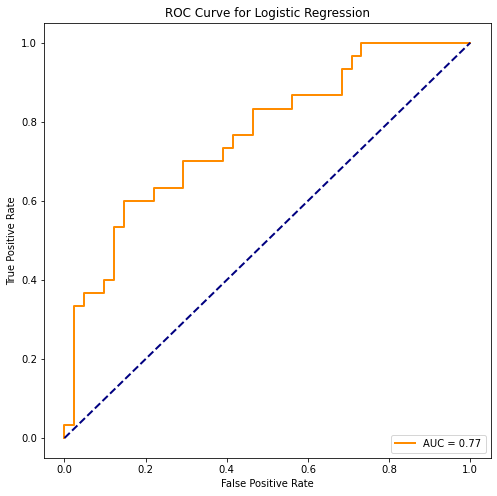

AUC (Area Under Curve): 0.7650


In [10]:
#D. Use Logistic Regression Classifier to predict Heart Disease occurrence based on the training/testing datasets that you built in part(c). Then, compute and report the Accuracy.

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Train the logistic regression model
my_logreg = LogisticRegression(random_state=3)
my_logreg.fit(X_train, y_train)

# Predictions on the test set
y_pred_logreg = my_logreg.predict(X_test)

# Calculate and report Accuracy
accuracy_logreg = accuracy_score(y_test, y_pred_logreg)
print(f"Logistic Regression Accuracy: {accuracy_logreg:.4f}")

# Now, predict probabilities using predict_proba method
y_prob_logreg = my_logreg.predict_proba(X_test)[:, 1]

# E. Plot the ROC Curve and Compute AUC
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Compute ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob_logreg)

# Compute AUC
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 8))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Logistic Regression')
plt.legend(loc='lower right')
plt.show()

# Print AUC
print(f"AUC (Area Under Curve): {roc_auc:.4f}")